# THE SPARKS FOUNDATION GRIPNOV22

# Task 5 : Exploratory Data Analysis - Sports 

#### DATA SCIENCE AND BUSINESS ANALYTICS INTERN: FOZAIL AHMED

#### Objective:
* Perform 'Exploratory Data Analysis' on the dataset 'Indian Premier League'.
* As a sports analyst, find out the most successful teams, players and factors contributing to a win or loss for a team. 
* Suggest teams or players a company should endorse for its products. 

#### Dataset :
* matches.csv and deliveries.csv: https://bit.ly/34SRn3b
* Contains IPL data from 2008 to 2019.

![](IPL.png)

##### Step 1: Importing the required Libraries

In [1]:
#Import the general libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

#Filter the warnings.
import warnings
warnings.filterwarnings('ignore')

##### Step 2: Import Datasets

In [2]:
#Importing the matches dataset which is in csv format.
data = pd.read_csv("matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#Importing the deliveries dataset which is in csv format.
Data = pd.read_csv("deliveries.csv")
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
print("The shape of the matches dataset is:",data.shape)
print("The shape of the deliveries dataset is",Data.shape)

The shape of the matches dataset is: (756, 18)
The shape of the deliveries dataset is (179078, 21)


#### Step 3: Pre-Processing of data

In [5]:
season_data=data[['id','season','winner']]
complete_data=Data.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [6]:
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [7]:
# We Dont need the umpire3 category, so let's drop it
data = data.drop(columns=["umpire3"],axis=1)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


#### Step 4: Exploratory Data Analysis on the datasets

#### Team and Seasonal Analysis 

In [8]:
#Highest wins by the teams in each season
wins_per_season = data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

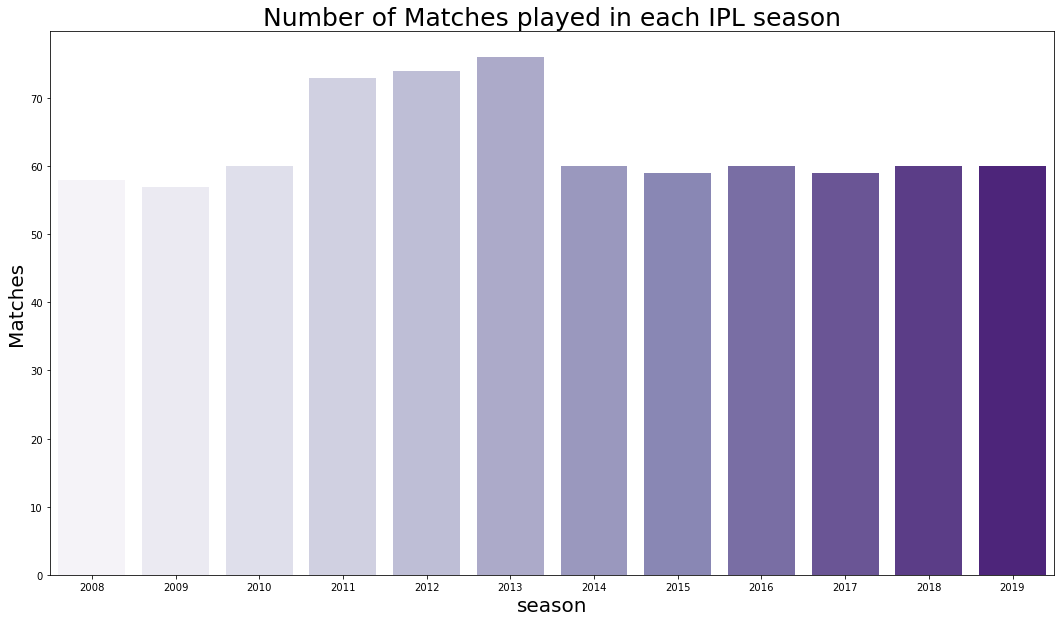

In [9]:
#Number of matches played in each IPL season
plt.figure(figsize = (18,10))
sns.countplot('season',data=data,palette="Purples")
plt.title("Number of Matches played in each IPL season",fontsize=25)
plt.xlabel("season",fontsize=20)
plt.ylabel('Matches',fontsize=20)
plt.show()

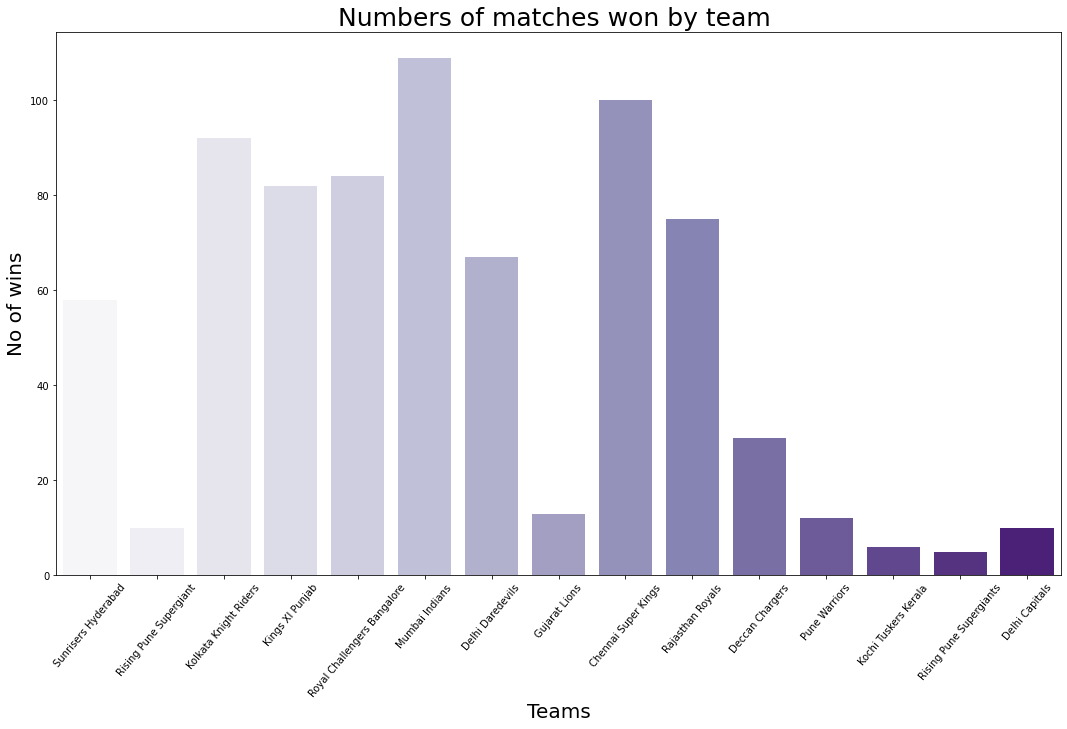

In [10]:
#Numbers of matches won by team
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=data, palette='Purples')
plt.title("Numbers of matches won by team ",fontsize=25)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=20)
plt.ylabel("No of wins",fontsize=20)
plt.show()

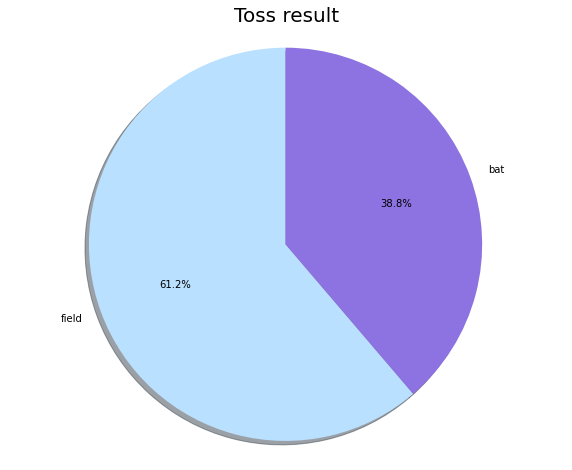

In [11]:
#We will plot a pie chart on the toss decision
Toss=data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#B9E0FF','#8D72E1']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

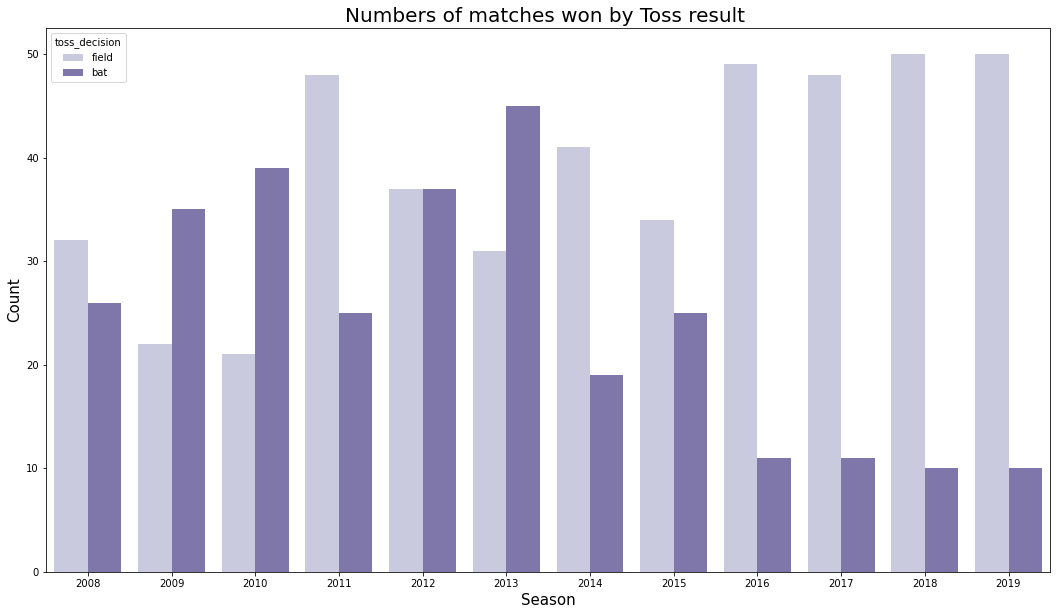

In [12]:
#We will plot a graph on the numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=data,palette='Purples')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [13]:
data['win_by']=np.where(data['win_by_runs']>0,'Bat first','Bowl first')

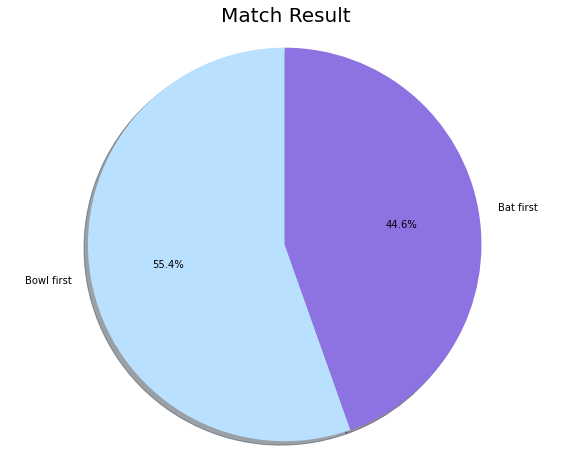

In [14]:
#Match result based on toss choice
Win=data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#B9E0FF','#8D72E1']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

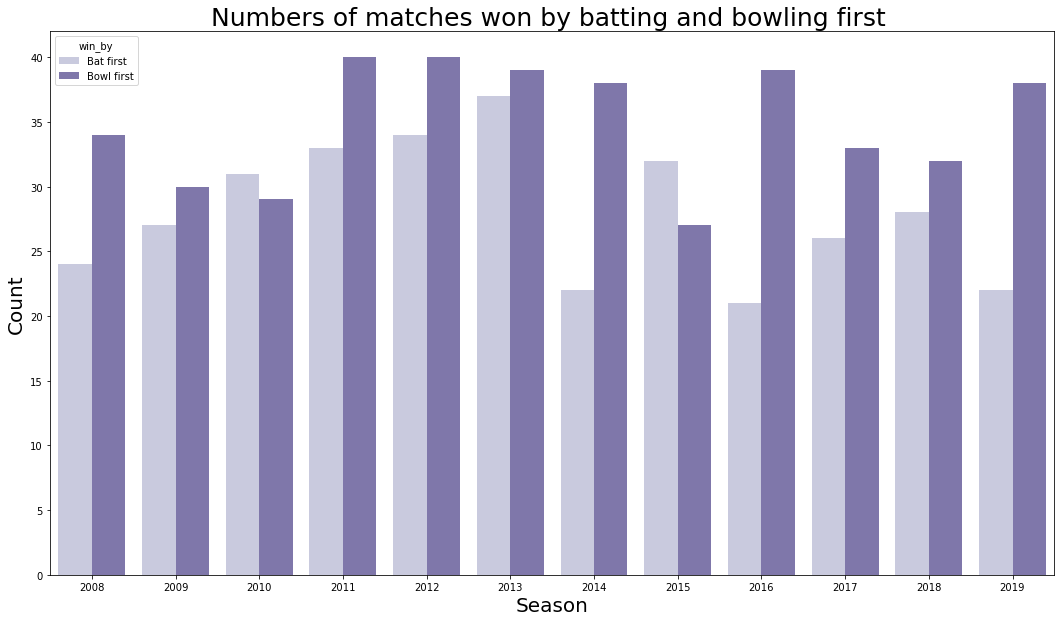

In [15]:
#No of matches won by batting and bowling first
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=data,palette='Purples')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=25)
plt.xlabel("Season",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

In [16]:
#Winner of IPL in every season
final_matches=data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


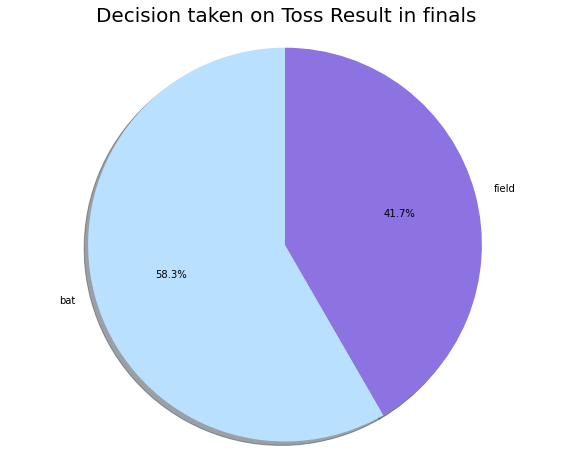

In [17]:
#Decision taken on the toss result in the finals
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#B9E0FF','#8D72E1']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Decision taken on Toss Result in finals',fontsize=20)
plt.axis('equal')
plt.show()

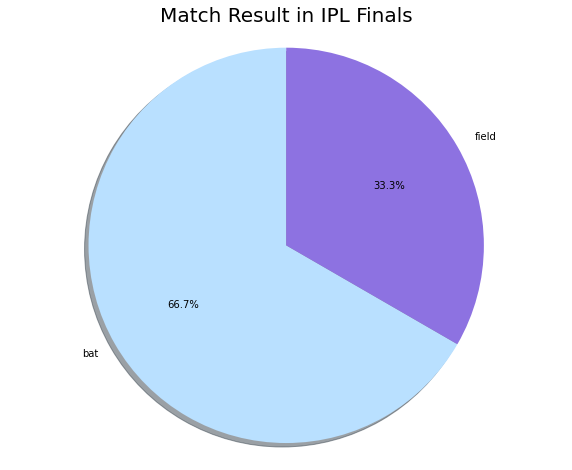

In [18]:
#We will plot a pie chart on the winning percentage in finals
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['#B9E0FF','#8D72E1']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result in IPL Finals',fontsize=20)
plt.axis('equal')
plt.show()

In [19]:
#IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [20]:
#number of season won by the teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [21]:
#toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [22]:
#Number of times a team won the final after winning the toss
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [23]:
#Printing the number of fours hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')]).sort_values('fours',ascending=0)

,runs by fours,fours
batting_team,,
Mumbai Indians,10352,2588
Kings XI Punjab,9832,2458
Kolkata Knight Riders,9736,2434
Royal Challengers Bangalore,9440,2360
Chennai Super Kings,8772,2193
Delhi Daredevils,8632,2158
Rajasthan Royals,8140,2035
Sunrisers Hyderabad,5776,1444
Deccan Chargers,3828,957


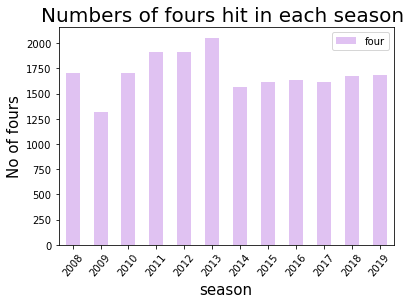

In [24]:
#graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = '#E0C2F2')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [25]:
#no of sixes hit by team
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')]).sort_values('sixes',ascending=0)

,runs by six,sixes
batting_team,,
Royal Challengers Bangalore,6792,1132
Mumbai Indians,6576,1096
Kings XI Punjab,5856,976
Chennai Super Kings,5838,973
Kolkata Knight Riders,5580,930
Delhi Daredevils,4806,801
Rajasthan Royals,4086,681
Sunrisers Hyderabad,3198,533
Deccan Chargers,2400,400


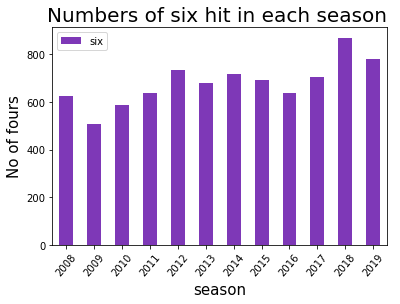

In [26]:
#graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = '#7E38B7')
plt.title("Numbers of six hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

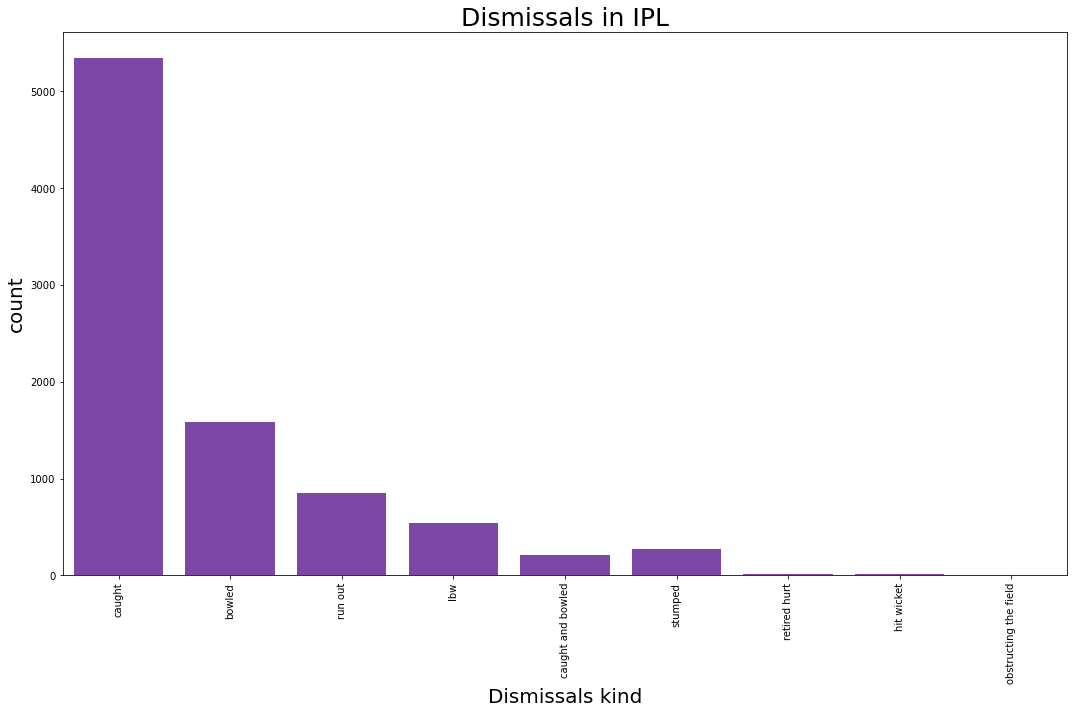

In [27]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(Data.dismissal_kind,color='#7E38B7')
plt.title("Dismissals in IPL",fontsize=25)
plt.xlabel("Dismissals kind",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### Individual/Player Analysis

<Figure size 1296x720 with 0 Axes>

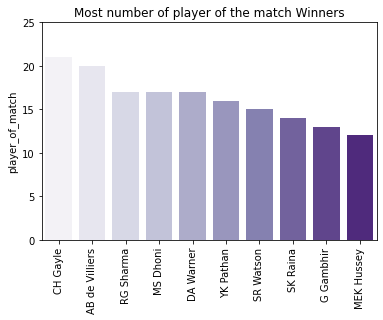

In [28]:
#Players with most no. of player of the matches in IPL
plt.figure(figsize = (18,10))
top_players = data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,25])
ax.set_ylabel("Count")
ax.set_title("Most number of player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Purples");
plt.show()

In [29]:
#Winner of the IPL season and player of the final
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


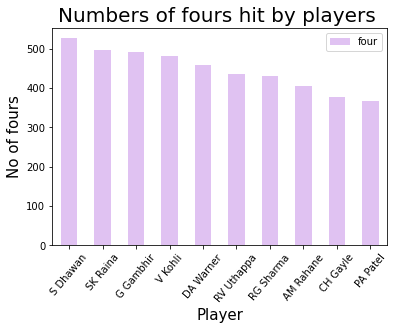

In [30]:
#graph on fours hit by the players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='#E0C2F2')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

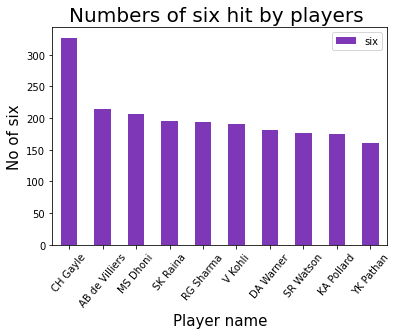

In [31]:
#graph of six hit by the players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='#7E38B7')
plt.title("Numbers of six hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

In [32]:
# the top 10 leading run scorers in IPL
batsman_score=Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorers in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorers in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [33]:
# Highest no of matches played by batsman
No_Matches_player= Data[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player.head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


In [34]:
wicket_data=Data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [35]:
#The most wicket taking bowlers in IPL
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


In [36]:
#Highest no. of catches by a player in IPL
catch=Data.loc[Data['dismissal_kind']=='caught']
highest_catches=catch.groupby('dismissal_kind')['fielder'].value_counts()
highest_catches.head(10)

dismissal_kind  fielder       
caught          KD Karthik        109
                SK Raina           99
                MS Dhoni           98
                AB de Villiers     93
                RV Uthappa         84
                RG Sharma          82
                KA Pollard         76
                V Kohli            73
                PA Patel           69
                S Dhawan           68
Name: fielder, dtype: int64

In [37]:
#Highest stumpings by a wicketkeeper in IPL
stumpings=Data.loc[Data['dismissal_kind']=='stumped']
highest_stumpings=stumpings.groupby('dismissal_kind')['fielder'].value_counts()
highest_stumpings.head(10)

dismissal_kind  fielder      
stumped         MS Dhoni         38
                RV Uthappa       32
                KD Karthik       29
                WP Saha          18
                AC Gilchrist     16
                PA Patel         16
                NV Ojha          10
                KC Sangakkara     9
                RR Pant           9
                Q de Kock         8
Name: fielder, dtype: int64

# Analytical report on statistics until 2019:


### Team and Seasonal Analysis/Summaries :

1. The highest number of matches played in the IPL season was 2013.

2. Mumbai Indians have won the most seasons in IPL history, i.e., 4 out of 12.

3. After winning the toss, most teams choose to take the field first. 

4. Teams that bowl first have a higher chance of winning than the team that bats first.

5. Surprisingly enough, most teams actually opt to bat first in the finals coin toss.

6. In finals, teams that decide to bat first win the matches more than the team that bowls first. 

7. It's worth noting that in nine of the 12 IPL finals, the team that won the toss also won the IPL.

8. With three hostings, Mumbai has hosted the most IPL finals in history.

9. The highest number of fours hit in a season was in 2013.

10. In 2018, there were more sixes struck in a season than ever before.

11. With 2588 fours, the Mumbai Indians were the team with the most fours.

12. With 1132 sixes, the Royal Challengers Bangalore were the team with the most sixes.

13. The most common reason for dismissal in IPL was "catch out".


### Player Analysis/Summaries :

14. Shikar Dhawan has the most fours in IPL history.

15. CH Gayle has the most sixes in IPL history.

16. SL Malinga is the most prolific wicket-taker in the IPL. 

17. The player with the highest number of catches is KD Karthik.

18. The wicket-keeper with the highest number of stumpings is MS Dhoni.

19. CH Gayle and AB de Villers are the players with the most player of the match awards.

20. The top three leading run scorers in IPL history are Virat Kohli, SK Raina, and RG Sharma.

21. SK Raina and RG Sharma have played the most matches in the IPL.


### Company Endorsement Analysis:

22. Companies should choose the Mumbai Indians to endorse their products because they have the most seasons won, the third-highest run scorer in RG Sharma, and the highest wicket taker in SL Malinga. 

23. Energy drink-based companies should choose Royal Challengers Bangalore to sponsor them as they have top hard-hitting players for exciting and energetic matches in CH Gayle, AB de Villiers, and the leading run scorer in IPL history, Virat Kohli.

#### Thank You!